# Various Techniques of Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

## Imputation

In [ ]:
data = pd.read_csv('../data/penguins.csv')

In [ ]:
data.head()

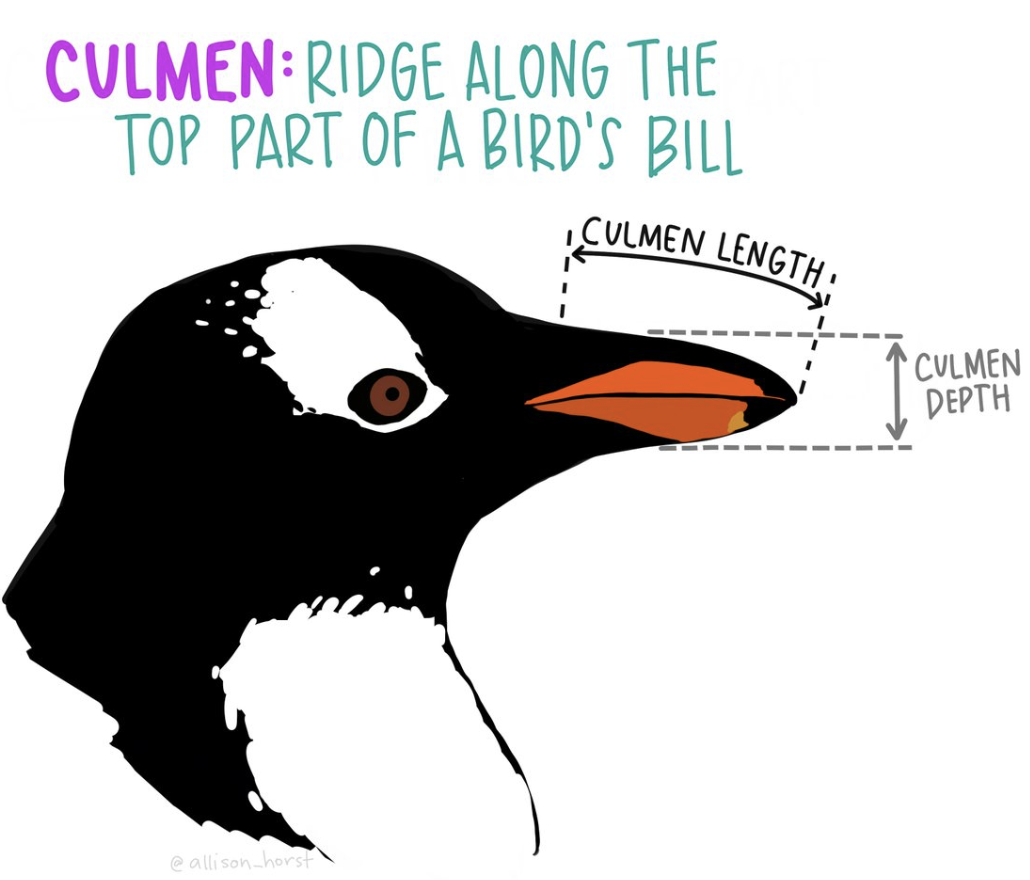

In [ ]:
data.shape

In [113]:
data.describe()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.00000,343.000000,343.000000,343.000000
mean,0.915452,43.66414,17.055394,199.696793,4175.291545
std,0.892706,6.39795,2.365015,20.759868,861.665260
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,39.20000,15.500000,190.000000,3550.000000
50%,1.000000,44.10000,17.300000,197.000000,4000.000000
75%,2.000000,48.50000,18.700000,213.000000,4750.000000
max,2.000000,59.60000,21.500000,231.000000,6300.000000


In [ ]:
# cont the missing values
print(data.isnull().sum())

### Droping Missing and NA Values

In [ ]:
# drop and check again with the functions from above
data = data.dropna()
data.sample(5)

### Replacing with Some Value

In [ ]:
# alternatively, replace them with a new value
data = pd.read_csv('../data/penguins.csv')
data = data.fillna(0)
data.head()

In [ ]:
data['sex'].value_counts().index[1]

In [ ]:
# better way
data = pd.read_csv('../data/penguins.csv')

data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)

data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head()

### Damaged Values

In [ ]:
data

In [ ]:
data.loc[(data['sex'] != 'FEMALE') & (data['sex'] != 'MALE')]

In [ ]:
data = data.drop([336])
data.reset_index()

## Categorical Encoding

In [ ]:
data.dtypes

In [ ]:
# assign a type
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')

In [ ]:
data.dtypes

In [ ]:
cat_data = data.select_dtypes(exclude=[np.number]).columns

In [ ]:
cat_data

In [ ]:
# categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
data[cat_data].head()

In [ ]:
categorical_data = data[cat_data]
categorical_data

### Label Encoding

In [ ]:
# digital coding of categorical data
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

In [ ]:
# drop columns
categorical_data = categorical_data.drop(['species_cat', 'sex_cat', 'island_cat'], axis=1)
categorical_data

### One-Hot Encoding

In [ ]:
encoded_species = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

In [ ]:
categorical_data.reset_index()

In [ ]:
categorical_data = categorical_data.join(encoded_species)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

In [ ]:
categorical_data.head()

### Count Encoding

In [ ]:
# count appearance
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

species_count = categorical_data['species'].value_counts()
island_count = categorical_data['island'].value_counts()
sex_count = categorical_data['sex'].value_counts()

categorical_data['species_count_enc'] = categorical_data['species'].map(species_count)
categorical_data['island_count_enc'] = categorical_data['island'].map(island_count)
categorical_data['sex_count_enc'] = categorical_data['sex'].map(sex_count)

categorical_data

In [ ]:
species_count

### Target Encoding

In [ ]:
# splitting into categories and calculating mean for each
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)

categorical_data["species"] = categorical_data["species"].cat.codes

island_means = categorical_data.groupby('island')['species'].mean()
sex_means = categorical_data.groupby('sex')['species'].mean()

In [ ]:
island_means

In [ ]:
sex_means

In [ ]:
# replace all categorical with the means per category
categorical_data['island_target_enc'] = categorical_data['island'].map(island_means)
categorical_data['sex_target_enc'] = categorical_data['sex'].map(sex_means)
categorical_data

## Detecting and Handling Outliers

In [ ]:
data["species"] = data["species"].cat.codes

In [ ]:
data

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sb.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")

### Using Standard Deviation

In [ ]:
factor = 0.5
upper_lim = data['culmen_length_mm'].mean () + data['culmen_length_mm'].std () * factor
lower_lim = data['culmen_length_mm'].mean () - data['culmen_length_mm'].std () * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

### Using Percentilles

In [ ]:
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

In [ ]:
outliers = pd.concat([data,no_outliers]).drop_duplicates(keep=False)
outliers

## Binning

In [ ]:
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

## Scaling

In [ ]:
# get statistics
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

In [ ]:
# draw histogram to visualize them
sb.distplot(scaled_data['body_mass_g'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Standard Scalling

In [ ]:
# reduce all with the mean and scale data to unit variance
# x = (x-xmin)/std
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean()) # almost 0
print('Standard Deviation:', scaled_data['body_mass_scaled'].std()) # almost 1

In [ ]:
# histogram has same shape, but 0,0 is in the middle
sb.distplot(scaled_data['body_mass_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Min-Max Scalling - Normalization

In [ ]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

In [ ]:
# values are in [0, 1]
sb.distplot(scaled_data['body_mass_min_max_scaled'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

In [ ]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

In [ ]:
sb.distplot(scaled_data['body_mass_q_trans_uniform'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

### Transform Into Normal Distribution

In [ ]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
scaled_data['body_mass_q_trans_normal'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_normal'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_normal'].std())

In [ ]:
sb.distplot(scaled_data['body_mass_q_trans_normal'], color='#ee4c2c', bins=50, hist_kws={'alpha': 0.4});

In [ ]:
scaled_data

## Feature Selection

In [ ]:
# selecting the k most informative features related to the output
feature_sel_data = data.drop(['species'], axis=1)

feature_sel_data["island"] = feature_sel_data["island"].cat.codes
feature_sel_data["sex"] = feature_sel_data["sex"].cat.codes

# Use 3 features
selector = SelectKBest(f_classif, k=3)

selected_data = selector.fit_transform(feature_sel_data, data['species'])
selected_data

In [ ]:
data.head()

In [ ]:
# convert from numpy to df
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), index=data.index, 
                                 columns=feature_sel_data.columns)

In [ ]:
# see the selected features
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

## Feature Grouping

### Numerical Grouping

In [ ]:
grouped_data = data.groupby('species')

sums_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].sum().add_suffix('_sum')
avgs_data = grouped_data['culmen_length_mm', 'culmen_depth_mm'].mean().add_suffix('_mean')

sumed_averaged = pd.concat([sums_data, avgs_data], axis=1)
sumed_averaged

### Categorical Grouping

In [ ]:
# fill_value for NaN
pivot = data.pivot_table(index='species', columns='sex', values='culmen_length_mm', aggfunc=np.mean, fill_value=0)
pivot

# Reference
https://rubikscode.net/2020/11/15/top-9-feature-engineering-techniques/